In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import datetime as dt
import seaborn as sns

In [2]:
df=pd.read_csv('fx_expanded_majors.csv', delimiter=';')

In [3]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

df=df.set_index('Date')

In [116]:
df.info()
# no nulls
# type of data:float64
# 27 variables, time-series
# date time from 1999-02-12 to 2018-12-31

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1039 entries, 2018-12-31 to 1999-02-12
Data columns (total 27 columns):
EURUSD    1039 non-null float64
GBPUSD    1039 non-null float64
AUDUSD    1039 non-null float64
USDCAD    1039 non-null float64
USDJPY    1039 non-null float64
USDNZD    1039 non-null float64
USDCHF    1039 non-null float64
USDSEK    1039 non-null float64
USDNOK    1039 non-null float64
USDZAR    1039 non-null float64
USDMXN    1039 non-null float64
USDKRW    1039 non-null float64
USDSGD    1039 non-null float64
USDBRL    1039 non-null float64
XAUUSD    1039 non-null float64
USDCNY    1039 non-null float64
USDHUF    1039 non-null float64
USDARS    1039 non-null float64
USDPLN    1039 non-null float64
USDHKD    1039 non-null float64
USDTRY    1039 non-null float64
USDIDR    1039 non-null int64
USDMYR    1039 non-null float64
USDRUB    1039 non-null float64
OIL       1039 non-null float64
US10YR    1039 non-null float64
SPX       1039 non-null float64
dtypes: float

In [6]:
df.describe().T
# Rub seems strange, let's have a closer look

,count,mean,std,min,25%,50%,75%,max
EURUSD,1039.0,1.207278,0.168904,0.8380,1.09190,1.2279,1.33395,1.5938
GBPUSD,1039.0,1.603840,0.195206,1.2167,1.46910,1.5870,1.70390,2.0903
AUDUSD,1039.0,0.778256,0.150405,0.4848,0.67895,0.7623,0.89580,1.0993
USDCAD,1039.0,1.236915,0.188391,0.9348,1.05790,1.2339,1.36010,1.6135
USDJPY,1039.0,106.818903,13.411953,75.8200,100.20500,109.1100,117.53000,134.7100
USDNZD,1039.0,1.560038,0.344521,1.1346,1.32145,1.4420,1.70790,2.5339
USDCHF,1039.0,1.173740,0.257499,0.7674,0.96740,1.0855,1.30345,1.8077
USDSEK,1039.0,7.841838,1.151437,5.9034,6.85040,7.7448,8.57350,10.9426
USDNOK,1039.0,7.025942,1.175557,5.0031,5.99520,6.7777,8.12545,9.5674
USDZAR,1039.0,9.038223,2.683717,5.6650,6.94440,7.9365,10.69930,16.7853


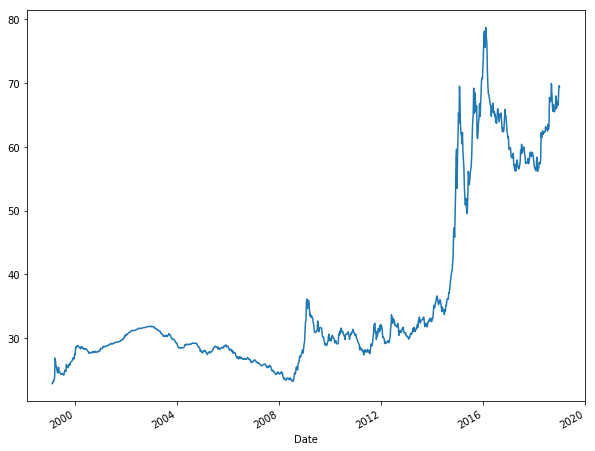

In [151]:
df['USDRUB'].plot(figsize=(10,8))

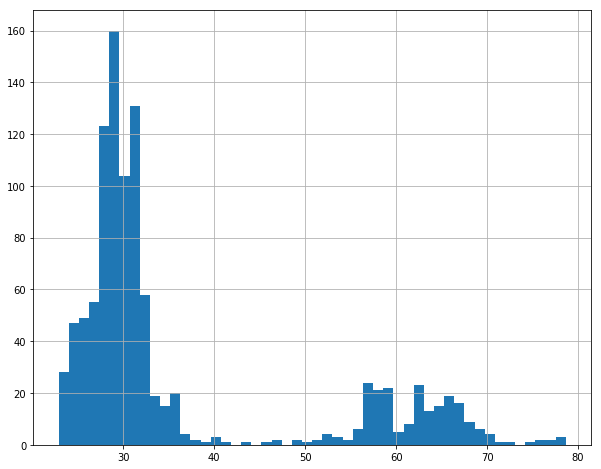

In [148]:
df['USDRUB'].hist(figsize=(10,8),bins=50)

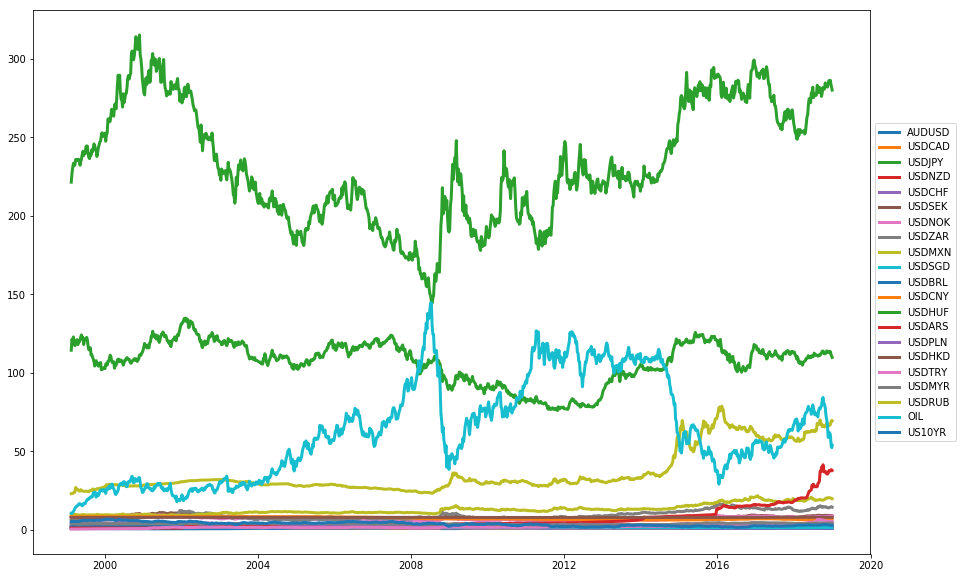

In [24]:
# Let's see other currencies

plt.figure(figsize=(15,10.))
for c in df.drop(['USDIDR','SPX','EURUSD','GBPUSD','XAUUSD','USDKRW'],axis=1).\
    columns.values:
    plt.plot(df.index, df[c], lw=3)

plt.legend(df.drop(['USDIDR','SPX','EURUSD','GBPUSD','XAUUSD','USDKRW'],axis=1).\
           columns.values,loc='center left',bbox_to_anchor=(1,0.5))


Moving window generation

In [25]:
def rolling_pca(window_data):
    transf=StandardScaler().fit_transform(window_data)
    pca = PCA(n_components=2)
    pca.fit(transf)
    return pca.components_[0], pca.components_[1], pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1]

#calculates 1st and 2nd principal components for the given data 

In [26]:
X_std=StandardScaler().fit_transform(df)
# before using PCA, scaling required

X_std_1=pd.DataFrame(X_std,index=df.index,columns=df.columns.tolist())
# create DataFrame out of scaled data

C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [64]:
curr=X_std_1.drop(['OIL','US10YR','SPX'],axis=1)
#choose only currencies

In [55]:
curr[curr.index.year==2018].head(5)

,EURUSD,GBPUSD,AUDUSD,USDCAD,USDJPY,USDNZD,USDCHF,USDSEK,USDNOK,USDZAR,...,XAUUSD,USDCNY,USDHUF,USDARS,USDPLN,USDHKD,USDTRY,USDIDR,USDMYR,USDRUB
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,-0.358826,-1.683342,-0.487958,0.673313,0.214173,-0.208906,-0.744592,0.878857,1.374443,1.978984,...,0.845077,-0.463214,1.257998,4.676641,0.511303,2.118702,3.332525,2.123721,1.366021,2.403744
2018-12-28,-0.372450,-1.711531,-0.489289,0.673844,0.257439,-0.199614,-0.734879,1.002849,1.431890,2.011194,...,0.841305,-0.430233,1.285235,4.724040,0.552923,2.066604,3.316874,2.215544,1.422208,2.417952
2018-12-21,-0.415098,-1.739208,-0.493945,0.654726,0.328305,-0.201937,-0.699134,1.043688,1.480401,2.089444,...,0.790936,-0.428937,1.337574,4.749908,0.578608,2.122710,3.357315,2.207806,1.490729,2.374721
2018-12-14,-0.454193,-1.770984,-0.406140,0.538953,0.490179,-0.257984,-0.682815,1.059067,1.353251,1.998109,...,0.752964,-0.468161,1.422757,4.634602,0.623978,1.393329,3.403200,2.222250,1.510463,2.223277
2018-12-07,-0.410952,-1.697693,-0.382193,0.506027,0.437962,-0.298930,-0.706127,1.046642,1.259208,1.910986,...,0.774768,-0.366627,1.368817,4.688609,0.574108,1.481496,3.345649,2.170149,1.457839,2.193275


In [29]:
rolling_pca(curr[curr.index.year==2018])

(array([ 0.22344232,  0.221893  ,  0.21954054, -0.18164821, -0.18118294,
        -0.21643853, -0.17250749, -0.21783176, -0.20883245, -0.22103658,
        -0.13106163, -0.20970012, -0.22642024, -0.20838938,  0.20949113,
        -0.20291965, -0.22518202, -0.21295409, -0.22248725, -0.01613833,
        -0.20795775, -0.21088507, -0.22056884, -0.21725309]),
 array([ 0.01049116, -0.04428596,  0.08293282, -0.16846426,  0.278882  ,
        -0.0778862 , -0.23553149, -0.20384864,  0.08142654,  0.04880471,
         0.06007276,  0.05082345,  0.03172847, -0.15059806, -0.00882924,
         0.28414408, -0.05288894,  0.17503266, -0.07727467, -0.76143022,
        -0.01413533, -0.03770735,  0.18976089, -0.07267566]),
 0.7884565451590276,
 0.06730599385858425)

In [30]:
pc1=[]
pc2=[]
weights1=[]
weights2=[]
explained_v1=[]
explained_v2=[]

for i in curr.index.year.unique():
    data=rolling_pca(curr[curr.index.year==i])
    pc1.append(data[0])
    pc2.append(data[1])
    
    weights1.append(np.square(data[0]))
    weights2.append(np.square(data[1]))

    explained_v1.append(data[2])
    explained_v2.append(data[3])
    
    
# Find 1st and 2nd principal components for every year from 1999-2018
# By squaring find the weights??? 

In [31]:
w1=pd.DataFrame(weights1,index=curr.index.year.unique(),columns=curr.columns.tolist())
w2=pd.DataFrame(weights2,index=curr.index.year.unique(),columns=curr.columns.tolist())
# create DataFrames from weights of each currency by year

w1_tr=w1.transpose()
w2_tr=w2.transpose()

explained=pd.DataFrame(np.column_stack([explained_v1,explained_v2]),index=curr.index.year.unique(),
                  columns=['First Component','Second Component'])
# explained variance ratios by first and second components as function of year

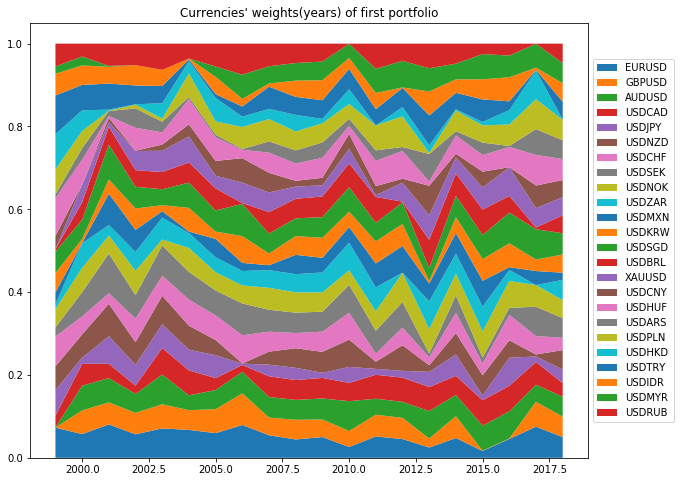

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w1_tr)
ax.set_title('Currencies\' weights(years) of first portfolio')
plt.legend(w1_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

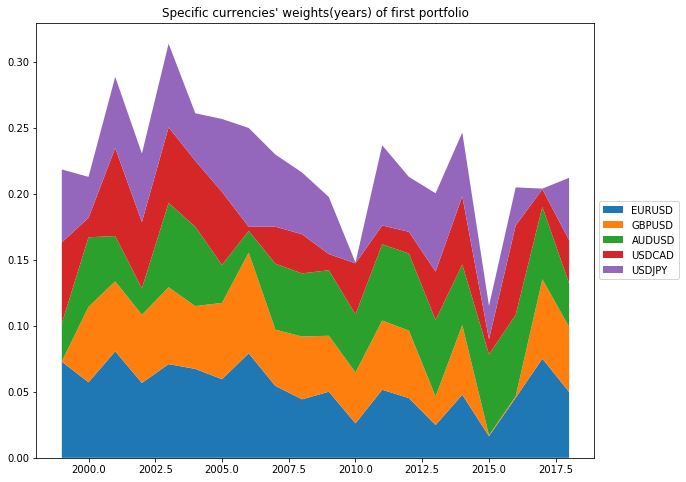

In [33]:
# Specific currencies selected of w1
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w1_tr.loc[['EURUSD','GBPUSD','USDCAD','USDJPY','USDRUB']])
ax.set_title('Specific currencies\' weights(years) of first portfolio')
plt.legend(w1_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

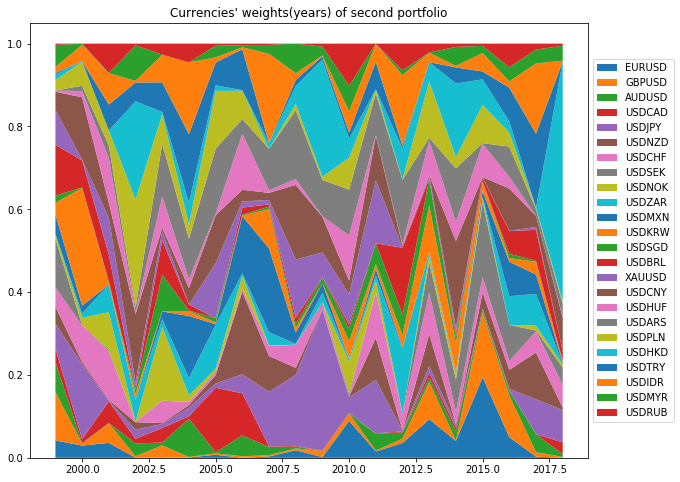

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w2_tr)
ax.set_title('Currencies\' weights(years) of second portfolio')
plt.legend(w2_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

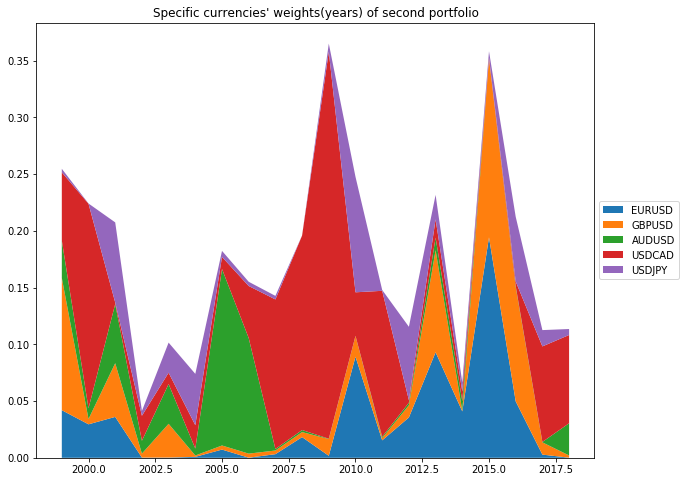

In [35]:
# Specific currencies selected of w2
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(X_std_1.index.year.unique(), w2_tr.loc[['EURUSD','GBPUSD','USDCAD','USDJPY','USDRUB']])
ax.set_title('Specific currencies\' weights(years) of second portfolio')
plt.legend(w2_tr.index,loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

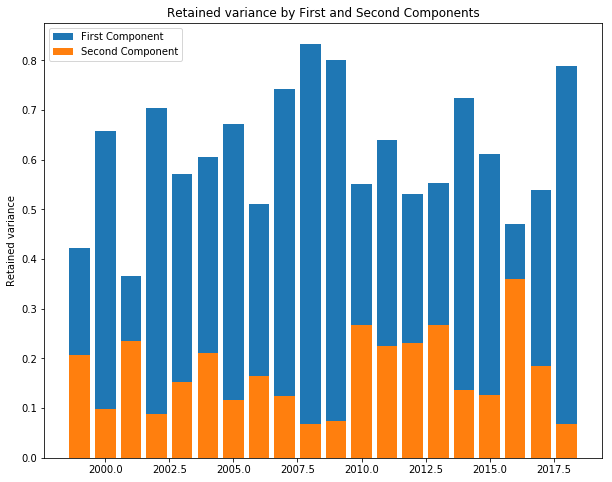

In [36]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

first=ax.bar(explained.index,explained.loc[:,'First Component'])
second=ax.bar(explained.index,explained.loc[:,'Second Component'])

ax.set_ylabel('Retained variance')
ax.set_title('Retained variance by First and Second Components')
ax.legend( (first[0], second[0]), ('First Component', 'Second Component') ,loc='upper left')

**Let's do the factor analysis**

In [117]:
factor_1=pd.DataFrame(index=df.index,columns=['factor_1'])

factor_2=pd.DataFrame(index=df.index,columns=['factor_2'])

In [119]:
for i in factor_1.index.year.unique():
    factor_1.loc[factor_1.index.year==i]=curr[curr.index.year==i].dot(w1_tr[[i]])
# find first factor change within time through scalar multiplication of X_std_1 and weights

for i in factor_2.index.year.unique():
    factor_2.loc[factor_2.index.year==i]=curr[curr.index.year==i].dot(w2_tr[[i]])

In [130]:
print(factor_1.head(5),'\n \n',
    factor_2.head(5))

            factor_1
Date                
2018-12-31  0.898996
2018-12-28   0.92528
2018-12-21   0.94573
2018-12-14  0.937397
2018-12-07  0.916925 
 
            factor_2
Date               
2018-12-31  1.49906
2018-12-28  1.48502
2018-12-21  1.53133
2018-12-14  1.11321
2018-12-07  1.16354


In [131]:
factor_1=factor_1.astype(float)

factor_2=factor_2.astype(float)
# required to find correlation matrix afterwards

In [135]:
X_std_2=X_std_1
X_std_2['factor_1']=factor_1
X_std_2['factor_2']=factor_2
X_std_2=X_std_2[['EURUSD', 'GBPUSD', 'OIL','US10YR','SPX','factor_1','factor_2']]

,EURUSD,GBPUSD,OIL,US10YR,SPX,factor_1,factor_2
EURUSD,1.000000,0.548419,0.782431,-0.377589,-0.077474,-0.732029,-0.648985
GBPUSD,0.548419,1.000000,0.225087,0.355716,-0.471216,-0.612663,-0.643874
OIL,0.782431,0.225087,1.000000,-0.546158,0.163462,-0.641032,-0.456095
US10YR,-0.377589,0.355716,-0.546158,1.000000,-0.456090,0.012875,0.023013
SPX,-0.077474,-0.471216,0.163462,-0.456090,1.000000,0.499762,0.568936
factor_1,-0.732029,-0.612663,-0.641032,0.012875,0.499762,1.000000,0.817685
factor_2,-0.648985,-0.643874,-0.456095,0.023013,0.568936,0.817685,1.000000


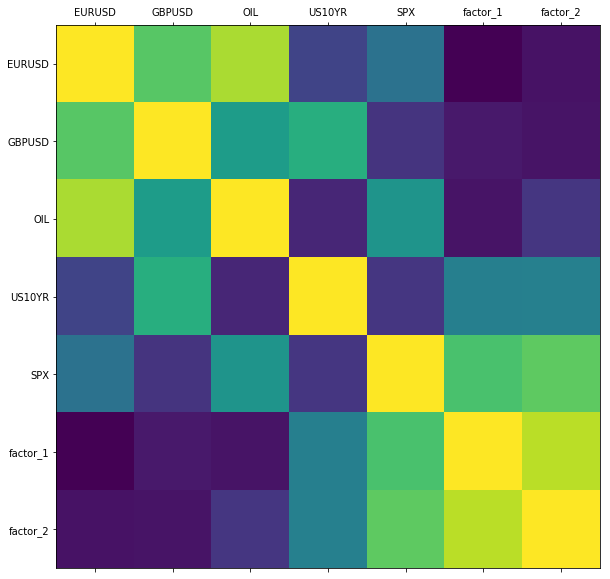

In [138]:
corr=X_std_2.corr()
size=10

fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

X_std_2.corr()